<a href="https://colab.research.google.com/github/DouglasDiasEng/Style-Transfer/blob/main/Style_Transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub


In [21]:
content_image_path = '/content/baina2.jpeg'
style_image_path = '/content/grito.jpg'

In [22]:
def load_image(path, size = (256, 256)):
  image = tf.io.decode_image(tf.io.read_file(path), channels = 3, dtype = tf.float32)[tf.newaxis, ...]
  image = tf.image.resize(image, size, preserve_aspect_ratio = True)
  return image

In [23]:
content_image = load_image(content_image_path,(384, 384))
style_image = load_image(style_image_path)

In [24]:
content_image.shape, style_image.shape

(TensorShape([1, 384, 288, 3]), TensorShape([1, 242, 256, 3]))

In [25]:
def show_images(images, titles = []):
  number_images = len(images)
  plt.figure(figsize = (12,12))
  gs = gridspec.GridSpec(1, number_images)
  for i in range(number_images):
    plt.subplot(gs[i])
    plt.axis('off')
    plt.imshow(images[i][0])
    plt.title(titles[i])

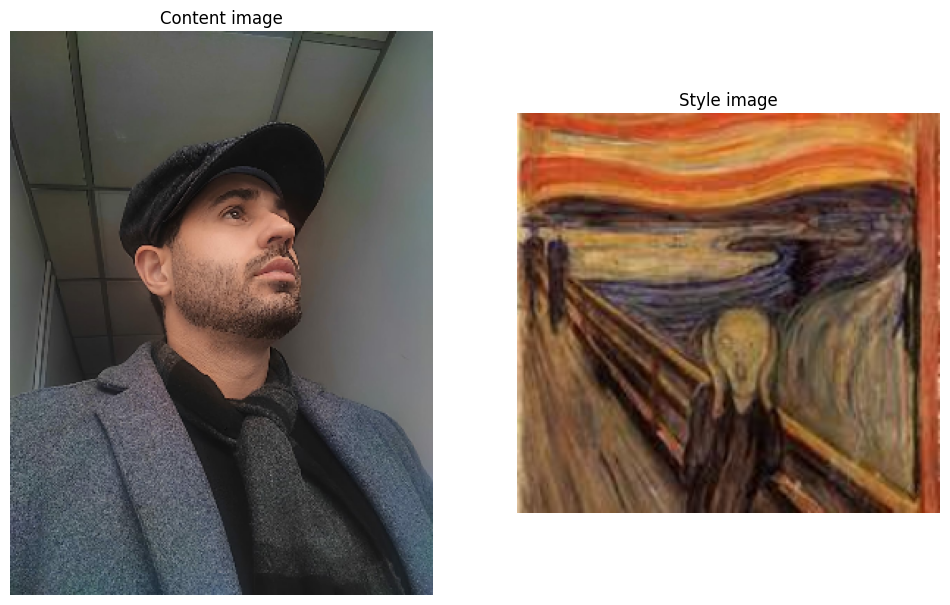

In [26]:
show_images([content_image, style_image], ['Content image', 'Style image'])

In [27]:
model_path = 'https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2'
model = hub.load(model_path)

In [28]:
results = model(tf.constant(content_image), tf.constant(style_image))

In [29]:
results

[<tf.Tensor: shape=(1, 384, 288, 3), dtype=float32, numpy=
 array([[[[0.88455325, 0.690301  , 0.5053787 ],
          [0.87862027, 0.6721555 , 0.49283764],
          [0.90481526, 0.7134768 , 0.5491623 ],
          ...,
          [0.5812541 , 0.32032126, 0.16099231],
          [0.730587  , 0.48698083, 0.25199202],
          [0.75477576, 0.49209446, 0.26908016]],
 
         [[0.87687737, 0.66416377, 0.48129493],
          [0.86801785, 0.6467988 , 0.46174735],
          [0.9020329 , 0.7020096 , 0.52940065],
          ...,
          [0.58642364, 0.31620863, 0.15983275],
          [0.7235429 , 0.48277578, 0.24555   ],
          [0.749077  , 0.49474633, 0.26055956]],
 
         [[0.849659  , 0.6163755 , 0.42541593],
          [0.84391636, 0.600268  , 0.40830228],
          [0.89221114, 0.68010783, 0.49052972],
          ...,
          [0.52604455, 0.2572981 , 0.12173425],
          [0.62547237, 0.37159193, 0.1658686 ],
          [0.6699468 , 0.39346033, 0.18269347]],
 
         ...,
 
       

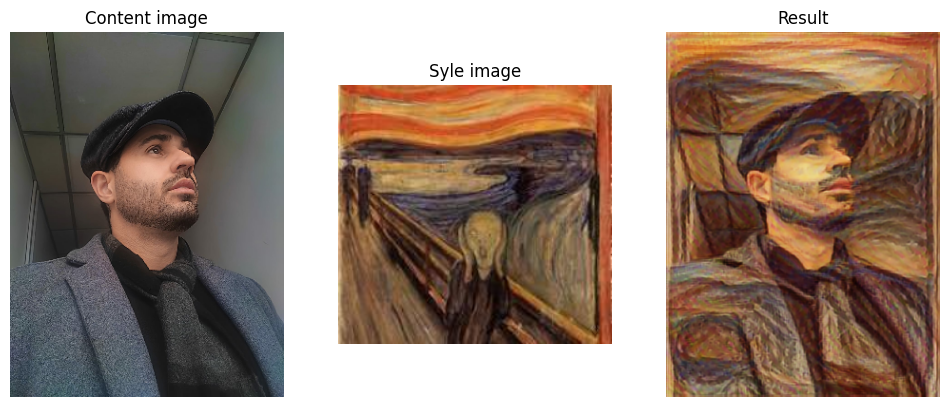

In [30]:
show_images([content_image, style_image, results[0]], ['Content image', 'Syle image', 'Result'])

In [31]:
result_image = tf.squeeze(results[0])
result_image = tf.clip_by_value(result_image, 0.0, 1.0)

In [32]:
plt.imsave("result.png", result_image.numpy())
print("Image saved as result.png")

Image saved as result.png
